# Fit a Gaussian with scipy.optimize.curve_fit

In [126]:
import  numpy as np

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from scipy.optimize import curve_fit

### Some links
https://stackoverflow.com/questions/11507028/fit-a-gaussian-function <BR>
https://stackoverflow.com/questions/40182684/applying-sklearn-gaussian-mixture-algorithm-to-fit-gm-curves

### Load the data

In [127]:
def load_data_xy():    
    rawdata='C:\\Python34\\datasets\\matkaaika_V1.csv'
    df = pd.read_csv(rawdata)

    # Delete unnecessary columns
    col_to_delete=['0', 'lunta', 'huono keli']
    df=df.drop(col_to_delete, 1)

    # Delete rows with missing values
    df = df.dropna()
    print(df.describe())
        
    X=df['min8'].values
    X=X.reshape(-1, 1)
    y=df['kesto'].values
    return(X, y, df)

In [128]:
X, y, df = load_data_xy()

            min8      kesto  viikonpaiva
count   30.00000  30.000000    30.000000
mean    54.80000  46.733333     3.233333
std     46.41596   5.576634     1.735697
min   -120.00000  42.000000     1.000000
25%     38.00000  43.250000     2.000000
50%     55.50000  44.000000     3.000000
75%     76.25000  47.750000     4.000000
max    160.00000  61.000000     7.000000


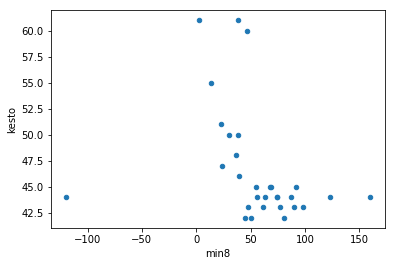

In [129]:
# Scatter plot
df.plot.scatter('min8', 'kesto')

### Auxiliary mirroring just to get more data

In [130]:
def mirror(X, y):
    Xnew = -0.0 - X
    ynew = y
    X = np.append(X, Xnew)
    y = np.append(y, ynew)
    return(X, y)

#X, y = mirror(X, y)
#plt.scatter(X, y)

### Shift and normalize

In [131]:
# Normalize the data
y = y-y[-1]
y = y/np.sum(y)

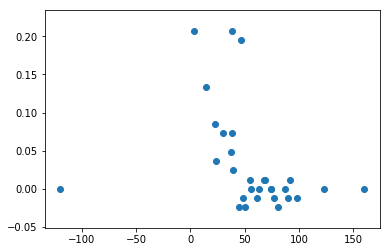

In [132]:
# Scatter plot
plt.scatter(X, y)

### Function to fit

In [133]:
def gaussian(x, *p):
    A, mu, sigma = p
    return(A*np.exp(-(x-mu)**2/(2.*sigma**2)))

### Get the fitted curve

In [134]:
# Initial guess
p0 = [1., 25., 1.]

# Fit
coeff, cov_mat = curve_fit(gaussian, X.ravel(), y.ravel(), p0=p0)

# Get the fitted curve
x_new = np.linspace(-150, 170, 100)
y_fit = gaussian(x_new, *coeff)

### Results

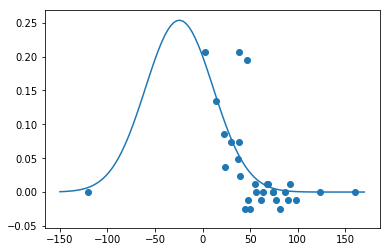

Mean =  -24.4284186723
Sigma (std) =  35.5828802485


In [135]:
plt.scatter(X, y, label='Data')
plt.plot(x_new, y_fit, label='Fit')
plt.show()

print('Mean = ', coeff[1])
print('Sigma (std) = ', coeff[2])